In [ ]:
# 자원순환정보시스템 api=OIZF6LPJKYIUCWX2CEKO05O1RX1N46OX8VL95HHDO5ABE

# 자원순환정보시스템 open api 조회
# http://www.recycling-info.or.kr/sds/JsonApi.do?PID={API서식번호} &YEAR={조회년도}&USRID={아이디}&KEY={API인증키}


# 자원순환정보시스템 open api 설명
# https://www.recycling-info.or.kr/statDoc/%ED%8F%90%EA%B8%B0%EB%AC%BC%ED%86%B5%EA%B3%84_OpenAPI%ED%99%9C%EC%9A%A9%EA%B0%80%EC%9D%B4%EB%93%9C.pdf

In [1]:
import requests
import pandas as pd
import json



list_df=[]
year=['2014','2015','2016','2017','2018']
for y in year:
    url = "http://www.recycling-info.or.kr/sds/JsonApi.do?PID=NTN003&YEAR="+y+"&USRID=kriem546&KEY=OIZF6LPJKYIUCWX2CEKO05O1RX1N46OX8VL95HHDO5ABE"
    response = requests.get(url)
    result=json.loads(response.text)

    data=result['data']
    df=pd.DataFrame(data)
    df['처리년도']=y
    list_df.append(df)
    
df_total=pd.concat(list_df)  

In [2]:
import requests
import pandas as pd
import json


url = "http://www.recycling-info.or.kr/sds/JsonApi.do?PID=NTN007&YEAR=2019&USRID=kriem546&KEY=OIZF6LPJKYIUCWX2CEKO05O1RX1N46OX8VL95HHDO5ABE"
response = requests.get(url)
result=json.loads(response.text)

data=result['data']
df=pd.DataFrame(data)
df['처리년도']='2019'

df.replace('\r','',inplace=True,regex=True)

In [3]:
import requests
import pandas as pd
import json


url = "http://www.recycling-info.or.kr/sds/JsonApi.do?PID=NTN007&YEAR=2020&USRID=kriem546&KEY=OIZF6LPJKYIUCWX2CEKO05O1RX1N46OX8VL95HHDO5ABE"
response = requests.get(url)
result=json.loads(response.text)

data=result['data']
df=pd.DataFrame(data)
df['처리년도']='2020'


df.replace('\r','',inplace=True,regex=True)

In [1]:
code=['W01', 'W02', 'W03', 'W04','W05','W06','W07','W08','W09','W0A','W0B','W0C','W0D','W0E','W0F','W0G','W0H','W0I','W0J','W0K','W0L','W0M',
      'W0N','W0P','W0Q','W0R','W0S','W0T','W0U','W0V','W0W','W0X','W0Y','W0Z','W10','W11','W12','W13','W14','W15','W16','W17','W18','W19',
      'W1A','W1B','W1C','W1D','W1E','W1F','W1G','W1H','W1I','W1J','W1K','W1L','W1M','W1O','W1P','W1Q','W1R','W1S','W1T','W1U','W1V','W1W',
      'W1X','W1Y','W1Z','W20','W21','W22','W23','W24','W25','W26','W27','W28','W29','W2A','W2B','W2D','W2G','W2H','W2I','W2L','W2P','W2Q',
      'W2R','W2S','W2T','W2U','W2V','W2W','W2Y','W30','W31','W32','W33','W34','W35','W36','W37','W38','W3C','W3D','W3E','W3F','W3G','W3H',
      'W3I','W3J','W3K','W3L','W3N','W3O','W3Q','W3S','W3U','W42','W44','W4C','W4H','W4N','W4O','W4Q','W4R','W4S','W4W','W4Z','W50','W51',
      'W52','W53','W54','W55','W56','W5D','W5I','W5J','W5K','W5M','W5P','W5S','W5T','W5U','W5V','W5W','W5X','W5Z','W61','W64','W67','W68',
      'W69','W6B','W6C','W6D','W6F','W6H','W6J','W6L','W6M','W6N','W6P','W6Q','W6S','W6V','W6W','W6X','W6Y','W6Z']

In [10]:
import requests
import pandas as pd
import json
import time

year=['2020']
month=['02','03','04','05','06','07','08','09','10','11','12']


for y in year:
    for m in month:
        list_df=[]
        for c in code:
            try:
                url = 'http://apis.data.go.kr/B552584/RfidFoodWasteServiceNew/getCityDateList'
                param ={'serviceKey' : 'PnDDFfwlwy/ruQHr8wpEN6CJoMvzkuUqorpGhCcvA6a2yajRCSoET2yx4a77oMwDWZ4RtUi1dY55HmVMDle4ig==', 
                        'type' : 'json', 'disYear' : y, 'disMonth' : m, 'cityCode' : c, 'page' : '1', 'rowNum' : '100' }

                response = requests.get(url, params=param)
                result=json.loads(response.text)
            except:
                url = 'http://apis.data.go.kr/B552584/RfidFoodWasteServiceNew/getCityDateList'
                param ={'serviceKey' : 'PnDDFfwlwy/ruQHr8wpEN6CJoMvzkuUqorpGhCcvA6a2yajRCSoET2yx4a77oMwDWZ4RtUi1dY55HmVMDle4ig==', 
                        'type' : 'json', 'disYear' : y, 'disMonth' : m, 'cityCode' : c, 'page' : '1', 'rowNum' : '100' }
                
                time.sleep(5)
                response = requests.get(url, params=param)
                result=json.loads(response.text)

            if result['data']['resultMsg']=='성공':
                data=result['data']
                df=pd.DataFrame(result['data']['list'])
                    
                list_df.append(df)
            
        df_month=pd.concat(list_df)            
        df_month.to_csv('Food_waste_'+y+'_'+m+'.csv',encoding='cp949')

In [9]:
import requests
import pandas as pd
import json
import time

month=['01','02','03','04','05','06','07','08','09','10']

for m in month:
    list_df=[]
    for c in code:
        try:
            url = 'http://apis.data.go.kr/B552584/RfidFoodWasteServiceNew/getCityDateList'
            param ={'serviceKey' : 'PnDDFfwlwy/ruQHr8wpEN6CJoMvzkuUqorpGhCcvA6a2yajRCSoET2yx4a77oMwDWZ4RtUi1dY55HmVMDle4ig==', 
                    'type' : 'json', 'disYear' : '2022', 'disMonth' : m, 'cityCode' : c, 'page' : '1', 'rowNum' : '1000' }

            response = requests.get(url, params=param)
            result=json.loads(response.text)
        except:
            url = 'http://apis.data.go.kr/B552584/RfidFoodWasteServiceNew/getCityDateList'
            param ={'serviceKey' : 'PnDDFfwlwy/ruQHr8wpEN6CJoMvzkuUqorpGhCcvA6a2yajRCSoET2yx4a77oMwDWZ4RtUi1dY55HmVMDle4ig==', 
                        'type' : 'json', 'disYear' : '2022', 'disMonth' : m, 'cityCode' : c, 'page' : '1', 'rowNum' : '1000' }
                
            time.sleep(5)
            response = requests.get(url, params=param)
            result=json.loads(response.text)

        if result['data']['resultMsg']=='성공':
            data=result['data']
            df=pd.DataFrame(result['data']['list'])
                    
            list_df.append(df)
            
    df_month=pd.concat(list_df)            
    df_month.to_csv('Food_waste_2022_'+m+'.csv',encoding='cp949')

In [1]:
import requests
import json
import pandas as pd

# 서울을 뺀 나머지 지역
url = "https://ecos.bok.or.kr/api/StatisticSearch/KIPUD3Q933N1288BVJZ8/json/kr/1/99999/511Y004/M/201501/202210/FMCA"
response = requests.get(url)
result=json.loads(response.text)

df=pd.DataFrame(result['StatisticSearch']['row'])
df.dropna(axis=1,inplace=True)
df['ID']=df['TIME']+df['ITEM_NAME2']

url = "https://ecos.bok.or.kr/api/StatisticSearch/KIPUD3Q933N1288BVJZ8/json/kr/1/99999/511Y004/M/201501/202210/FMCB"
response = requests.get(url)

result=json.loads(response.text)
df1=pd.DataFrame(result['StatisticSearch']['row'])

df1.dropna(axis=1,inplace=True)
df1['ID']=df1['TIME']+df1['ITEM_NAME2']
df1.drop(['STAT_CODE','STAT_NAME','ITEM_CODE2','ITEM_NAME2','TIME'],axis=1,inplace=True)
df1.columns=['ITEM_CODE3','ITEM_NAME3','DATA_VALUE2','ID']
df_csi=pd.merge(df,df1,how='left',on='ID')

# 지역 서울
url = "https://ecos.bok.or.kr/api/StatisticSearch/KIPUD3Q933N1288BVJZ8/json/kr/1/99999/511Y002/M/201501/202210/FMCA/F0001"
response = requests.get(url)
result=json.loads(response.text)

df=pd.DataFrame(result['StatisticSearch']['row'])
df.dropna(axis=1,inplace=True)
df['ID']=df['TIME']+df['ITEM_NAME2']

url = "https://ecos.bok.or.kr/api/StatisticSearch/KIPUD3Q933N1288BVJZ8/json/kr/1/99999/511Y002/M/201501/202210/FMCB/F0001"
response = requests.get(url)
response = requests.get(url)

result=json.loads(response.text)
df1=pd.DataFrame(result['StatisticSearch']['row'])

df1.dropna(axis=1,inplace=True)
df1['ID']=df1['TIME']+df1['ITEM_NAME2']
df1.drop(['STAT_CODE','STAT_NAME','ITEM_CODE2','ITEM_NAME2','TIME'],axis=1,inplace=True)
df1.columns=['ITEM_CODE3','ITEM_NAME3','DATA_VALUE2','ID']

df_csi_seoul=pd.merge(df,df1,how='left',on='ID')
df_csi_total=pd.concat([df_csi, df_csi_seoul])

df_csi_total.drop(['STAT_CODE','STAT_NAME','ITEM_NAME1','ITEM_CODE1','ITEM_CODE2','ITEM_NAME3','ITEM_CODE3','ID'],axis=1,inplace=True)

df_csi_total=df_csi_total[['TIME','ITEM_NAME2','DATA_VALUE','DATA_VALUE2']]
df_csi_total.columns=['TIME','AREA','가계수입전망CSI','소비지출전망CSI']

df1=df_csi_total[df_csi_total['AREA']=='대구경북']
df2=df_csi_total[df_csi_total['AREA']=='광주전남']
df3=df_csi_total[df_csi_total['AREA']=='대전세종충남']

area={'AREA':{'부산':'부산광역시','대구경북':'경상북도','인천':'인천광역시','광주전남':'전라남도','대전세종충남':'충청남도',
              '울산':'울산광역시','경기':'경기도','강원':'강원도','충북':'충청북도','전북':'전라북도','경남':'경상남도',
              '제주':'제주특별자치도','서울':'서울특별시'}}

df_csi_total.replace(area,inplace=True)
df1.replace({'대구경북':'대구광역시'},inplace=True)
df2.replace({'광주전남':'광주광역시'},inplace=True)
df3.replace({'대전세종충남':'대전광역시'},inplace=True)
df_csi_total=pd.concat([df_csi_total,df1,df2,df3])

df_csi_total.reset_index(inplace=True)
df_csi_total.drop('index',axis=1,inplace=True)
df_csi_total['ID']=df_csi_total['TIME']+df_csi_total['AREA']

C:\Users\YONSAI\AppData\Local\Temp\ipykernel_6680\2356942517.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace({'대구경북':'대구광역시'},inplace=True)
C:\Users\YONSAI\AppData\Local\Temp\ipykernel_6680\2356942517.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace({'광주전남':'광주광역시'},inplace=True)
C:\Users\YONSAI\AppData\Local\Temp\ipykernel_6680\2356942517.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.replace

In [2]:
import os
import numpy as np

path='./Food_waste'
file_list=os.listdir(path)

list_df=[]
for f in file_list:
    df=pd.read_csv('./Food_waste/'+f,encoding='cp949')
    list_df.append(df)
    
df_total=pd.concat(list_df)
df_total=df_total.astype(str)

df_total['disMonth']=df_total['disMonth'].str.zfill(2)
df_total['disDate']=df_total['disDate'].str.zfill(2)

df_total.drop('Unnamed: 0',axis=1,inplace=True)
df_total['ID']=df_total['disYear']+df_total['disMonth']+df_total['citySidoName']

df_m=pd.merge(df_total,df_csi_total,how='left',on='ID')
df_m.drop(['TIME','AREA','ID'],axis=1,inplace=True)
df_m['disQuantity']=df_m['disQuantity'].astype(float)
df_m['disMonth']=df_m['disMonth'].astype(int)
# df_m['disDay']=df_m['disDay'].astype(int)

list_disDay=[]
for i in df_m['disDay']:
    if i=='1':
        list_disDay.append('일')
    elif i=='2':
        list_disDay.append('월')
    elif i=='3':
        list_disDay.append('화')
    elif i=='4':
        list_disDay.append('수')
    elif i=='5':
        list_disDay.append('목')
    elif i=='6':
        list_disDay.append('금')
    elif i=='7':
        list_disDay.append('토')
df_m['disDay']=list_disDay
df_m['sin_Month']=np.sin(2 * np.pi * df_m['disMonth']/12)

In [ ]:
# def Base36(code):
    
#     Base36_code='0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    
#     length=len(code)
    
#     Base10=0
    
#     for i in range(length): 
#         num = 0
#         for b in Base36_code:
#             if b==code[i].upper():
#                 Base10 += (num*(36**(length-i-1)))
#             num +=1
#     return Base10

In [3]:
df_m.isnull().sum()

disYear            0
disMonth           0
disDate            0
disDay             0
cityCode           0
citySidoName       0
citySggName        0
disQuantity        0
disQuantityRate    0
disCount           0
disCountRate       0
가계수입전망CSI          0
소비지출전망CSI          0
sin_Month          0
dtype: int64

In [ ]:
# df_m['target']=df_m['disQuantity']
# dfs=df_m.drop(['citySidoName','citySggName','disQuantity'],axis=1)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()

# df_scaled=dfs.iloc[:, :-1]   #마지막열임을 나타내는 -1은 포함하지 않음
# scaler.fit(df_scaled)
# df_scaled=scaler.transform(df_scaled)

# #스케일링 변환된 값을 데이터프레임에 반영
# df.iloc[:, :-1]=df_scaled[:, :]
# df

In [ ]:
# df_m.drop('disQuantity',axis=1,inplace=True)

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.displot(x='disQuantity',kind='hist',data=dfm)
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# for df in df_area:
#     sns.displot(x='disQuantity',kind='hist',data=df)
#     plt.show()

In [4]:
import warnings
warnings.filterwarnings('ignore')

def outlier(df):
    quantity = df['disQuantity']

    if quantity > q3 + 1.5 * iqr or quantity < q1 - 1.5 * iqr:
        return True
    else:
        return False

In [27]:
df_seoul=df_m[df_m['citySidoName']=='서울특별시']
df_gyeonggi=df_m[(df_m['citySidoName']=='경기도') | (df_m['citySidoName']=='인천광역시')]
df_gyeongsangnamdo=df_m[(df_m['citySidoName']=='경상남도') | (df_m['citySidoName']=='부산광역시') | (df_m['citySidoName']=='울산광역시')]
df_gyeongsangbukdo=df_m[(df_m['citySidoName']=='경상북도') | (df_m['citySidoName']=='대구광역시')]
df_gangwondo=df_m[df_m['citySidoName']=='강원도']
df_chungcheongdo=df_m[(df_m['citySidoName']=='충청북도') | (df_m['citySidoName']=='충청남도') | (df_m['citySidoName']=='대전광역시')]
df_jeollado=df_m[(df_m['citySidoName']=='전라북도') | (df_m['citySidoName']=='전라남도') | (df_m['citySidoName']=='광주광역시')]
df_jeju=df_m[df_m['citySidoName']=='제주특별자치도']

In [28]:
df_area=[]
df_area=[df_seoul,df_gyeonggi,df_gyeongsangnamdo,df_gyeongsangbukdo,
         df_gangwondo,df_chungcheongdo,df_jeollado,df_jeju]

In [52]:
for df in df_area:
    
    q3=df['disQuantity'].quantile(0.75)
    q1=df['disQuantity'].quantile(0.25)
    iqr=q3-q1
    
    
    df['이상치여부']=df.apply(outlier, axis = 1)
    
    print(df[df['이상치여부']==True]['citySggName'].value_counts())
    print('-----------------')

중랑구    5
양천구    4
강서구    3
동작구    3
Name: citySggName, dtype: int64
-----------------
서구        94
수원시권선구    92
남동구       59
의왕시       16
남양주시       9
구리시        1
과천시        1
Name: citySggName, dtype: int64
-----------------
북구      18
사하구     13
양산시     11
부산진구     7
진주시      5
사상구      3
창녕군      1
Name: citySggName, dtype: int64
-----------------
영주시    18
남구      7
중구      1
Name: citySggName, dtype: int64
-----------------
Series([], Name: citySggName, dtype: int64)
-----------------
중구     63
대덕구    25
Name: citySggName, dtype: int64
-----------------
북구     10
광산구     7
서구      2
진안군     1
Name: citySggName, dtype: int64
-----------------
Series([], Name: citySggName, dtype: int64)
-----------------


In [31]:
df_seoul_outlier=df_seoul[(df_seoul['citySggName']=='송파구')|(df_seoul['citySggName']=='노원구')|(df_seoul['citySggName']=='도봉구')|(df_seoul['citySggName']=='마포구')|(df_seoul['citySggName']=='영등포구')|(df_seoul['citySggName']=='강동구')]
df_gyeonggi_outlier=df_gyeonggi[(df_gyeonggi['citySggName']=='용인시')|(df_gyeonggi['citySggName']=='화성시')|(df_gyeonggi['citySggName']=='수원시영통구')|(df_gyeonggi['citySggName']=='하남시')]
df_gyeongsangnamdo_outlier=df_gyeongsangnamdo[(df_gyeongsangnamdo['citySggName']=='김해시')|(df_gyeongsangnamdo['citySggName']=='해운대구')]
df_gyeongsangbukdo_outlier=df_gyeongsangbukdo[(df_gyeongsangbukdo['citySggName']=='달서구')|(df_gyeongsangbukdo['citySggName']=='구미시')|(df_gyeongsangbukdo['citySggName']=='포항시')|(df_gyeongsangbukdo['citySggName']=='경산시')|(df_gyeongsangbukdo['citySggName']=='수성구')|(df_gyeongsangbukdo['citySggName']=='북구')|(df_gyeongsangbukdo['citySggName']=='달성군')|(df_gyeongsangbukdo['citySggName']=='안동시')|(df_gyeongsangbukdo['citySggName']=='김천시')|(df_gyeongsangbukdo['citySggName']=='동구')]
df_gangwondo_outlier=df_gangwondo[(df_gangwondo['citySggName']=='원주시')|(df_gangwondo['citySggName']=='동해시')|(df_gangwondo['citySggName']=='춘천시')|(df_gangwondo['citySggName']=='강릉시')]
df_chungcheongdo_outlier=df_chungcheongdo[(df_chungcheongdo['citySggName']=='청주시')|(df_chungcheongdo['citySggName']=='서구')]
df_jeollado_outlier=df_jeollado[df_jeollado['citySggName']=='익산시']

In [35]:
df_area_outlier=[df_seoul_outlier,df_gyeonggi_outlier,df_gyeongsangnamdo_outlier,df_gyeongsangbukdo_outlier,
                 df_gangwondo_outlier,df_chungcheongdo_outlier,df_jeollado_outlier]

In [32]:
seoul_idx=df_seoul_outlier.index
gyeonggi_idx=df_gyeonggi_outlier.index
gyeongsangnamdo_idx=df_gyeongsangnamdo_outlier.index
gyeongsangbukdo_idx=df_gyeongsangbukdo_outlier.index
gangwondo_idx=df_gangwondo_outlier.index
chungcheongdo_idx=df_chungcheongdo_outlier.index
jeollado_idx=df_jeollado_outlier.index


df_seoul.drop(seoul_idx,inplace=True)
df_gyeonggi.drop(gyeonggi_idx,inplace=True)
df_gyeongsangnamdo.drop(gyeongsangnamdo_idx,inplace=True)
df_gyeongsangbukdo.drop(gyeongsangbukdo_idx,inplace=True)
df_gangwondo.drop(gangwondo_idx,inplace=True)
df_chungcheongdo.drop(chungcheongdo_idx,inplace=True)
df_jeollado.drop(jeollado_idx,inplace=True)

In [36]:
df_outlier=pd.concat(df_area_outlier)

q3=df_outlier['disQuantity'].quantile(0.75)
q1=df_outlier['disQuantity'].quantile(0.25)
iqr=q3-q1
    
df_outlier['이상치여부']=df_outlier.apply(outlier, axis = 1)
    
print(df_outlier[df_outlier['이상치여부']==True]['citySggName'].value_counts())
print('-----------------')

용인시    1486
익산시    1156
화성시     632
도봉구      13
동해시       3
하남시       1
김해시       1
Name: citySggName, dtype: int64
-----------------


In [37]:
df_t=df_outlier.drop(['이상치여부','cityCode'],axis=1)
df_t=df_t.astype({'disQuantityRate':'float','disCount':'int','disCountRate':'float','가계수입전망CSI':'int','소비지출전망CSI':'int'})

df_test3=pd.get_dummies(df_t)

df_test3['target']=df_test3['disQuantity']
df_test3.drop('disQuantity',axis=1,inplace=True)

In [38]:
df_test3

disMonth  disQuantityRate  disCount  disCountRate  가계수입전망CSI  \
248            1             1.34     13632          3.36        105   
249            1             6.59     15140          3.73        105   
250            1             4.71     13156          3.24        105   
251            1             2.94     13060          3.22        105   
252            1             3.18     12828          3.16        105   
...          ...              ...       ...           ...        ...   
268459        10             3.04     16549          3.10         91   
268460        10             3.59     17033          3.19         91   
268461        10             3.08     16757          3.14         91   
268462        10             0.98     16182          3.03         91   
268463        10             5.57     18907          3.54         91   

        소비지출전망CSI  sin_Month  disYear_2018  disYear_2019  disYear_2020  ...  \
248           108   0.500000             1             0             0  ...   
249           108   0.500000             1             0             0  ...   
250           108   0.500000             1             0             0  ...   
251           108   0.500000             1             0             0  ...   
252           108   0.500000             1             0             0  ...   
...           ...        ...           ...           ...           ...  ...   
268459        105  -0.866025             0             0             0  ...   
268460        105  -0.866025             0             0             0  ...   
268461        105  -0.866025             0             0             0  ...   
268462        105  -0.866025             0             0             0  ...   
268463        105  -0.866025             0             0             0  ...   

        citySggName_용인시  citySggName_원주시  citySggName_익산시  citySggName_청주시  \
248                   0                0                0                0   
249                   0                0                0                0   
250                   0                0                0                0   
251                   0                0                0                0   
252                   0                0                0                0   
...                 ...              ...              ...              ...   
268459                0                0                1                0   
268460                0                0                1                0   
268461                0                0                1                0   
268462                0                0                1                0   
268463                0                0                1                0   

        citySggName_춘천시  citySggName_포항시  citySggName_하남시  citySggName_해운대구  \
248                   0                0                0                 0   
249                   0                0                0                 0   
250                   0                0                0                 0   
251                   0                0                0                 0   
252                   0                0                0                 0   
...                 ...              ...              ...               ...   
268459                0                0                0                 0   
268460                0                0                0                 0   
268461                0                0                0                 0   
268462                0                0                0                 0   
268463                0                0                0                 0   

        citySggName_화성시       target  
248                   0   22510200.0  
249                   0  110544950.0  
250                   0   79081950.0  
251                   0   49425150.0  
252                   0   53389300.0  
...                 ...          ...  
268459                0   90310452.

In [49]:
df_m1=df_m.astype({'disQuantityRate':'float','disCount':'int','disCountRate':'float','가계수입전망CSI':'int','소비지출전망CSI':'int'})

In [50]:
df_m1.corr()

disMonth  disQuantity  disQuantityRate  disCount  \
disMonth         1.000000     0.026323        -0.019278  0.051265   
disQuantity      0.026323     1.000000         0.100640  0.866564   
disQuantityRate -0.019278     0.100640         1.000000  0.015092   
disCount         0.051265     0.866564         0.015092  1.000000   
disCountRate    -0.022393     0.021776         0.895851  0.009913   
가계수입전망CSI       -0.081775     0.049182         0.010910  0.015625   
소비지출전망CSI       -0.003585     0.022675         0.004795  0.014452   
sin_Month       -0.777261    -0.036551         0.021502 -0.083280   

                 disCountRate  가계수입전망CSI  소비지출전망CSI  sin_Month  
disMonth            -0.022393  -0.081775  -0.003585  -0.777261  
disQuantity          0.021776   0.049182   0.022675  -0.036551  
disQuantityRate      0.895851   0.010910   0.004795   0.021502  
disCount             0.009913   0.015625   0.014452  -0.083280  
disCountRate         1.000000   0.012678   0.005569   0.024975  
가계수입전망CSI            0.012678   1.000000   0.822401   0.086310  
소비지출전망CSI            0.005569   0.822401   1.000000   0.015598  
sin_Month            0.024975   0.086310   0.015598   1.000000

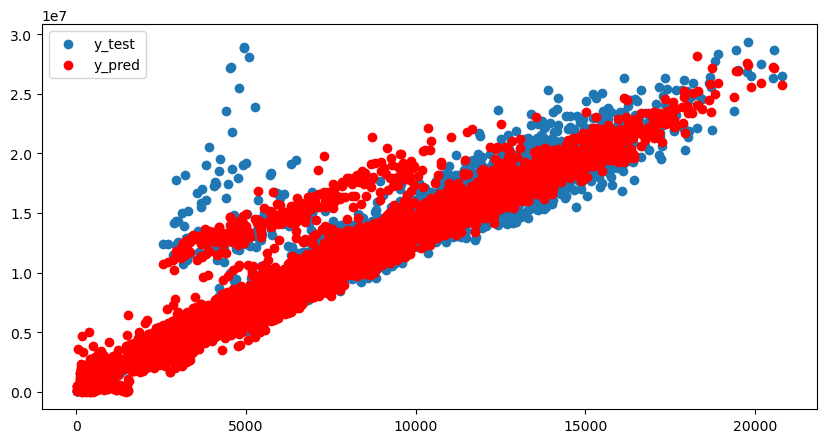

0.9355961457771543


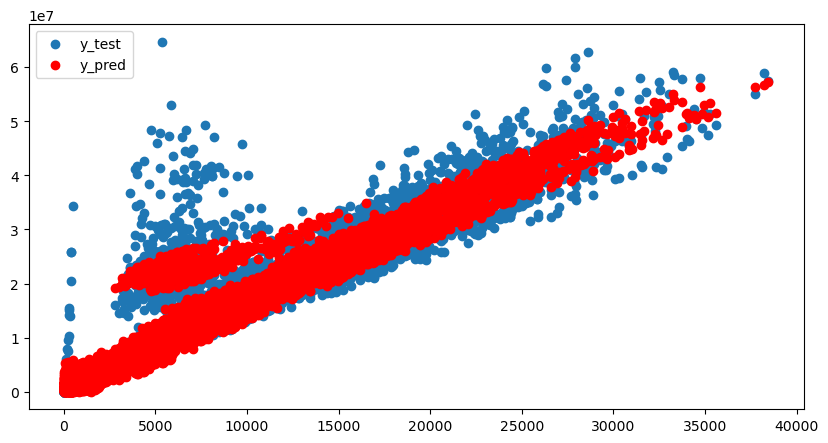

0.9528706794364893


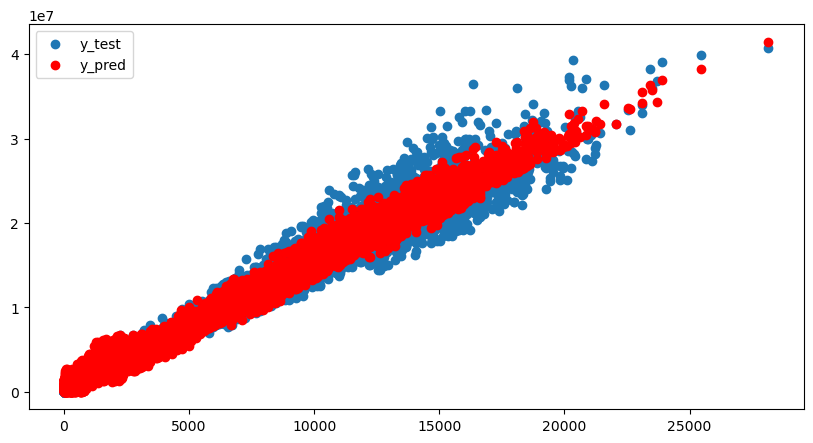

0.9824934364641578


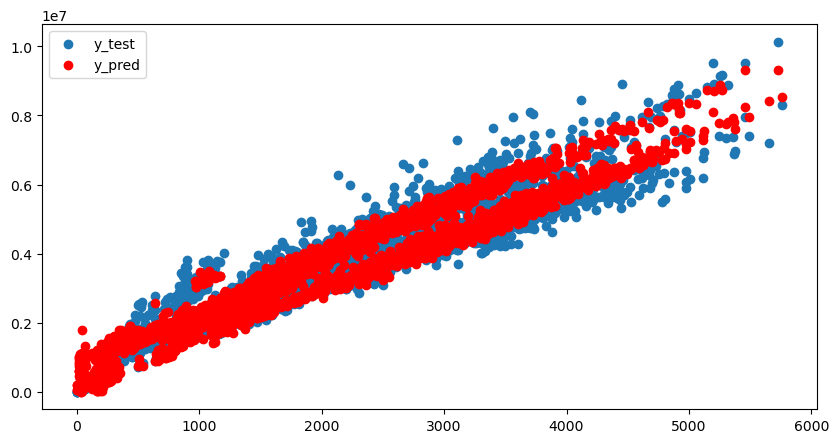

0.963868842188937


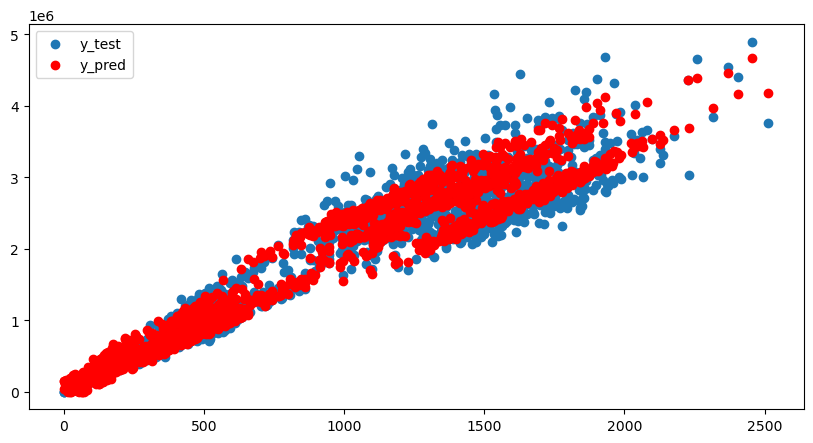

0.9819997423921704


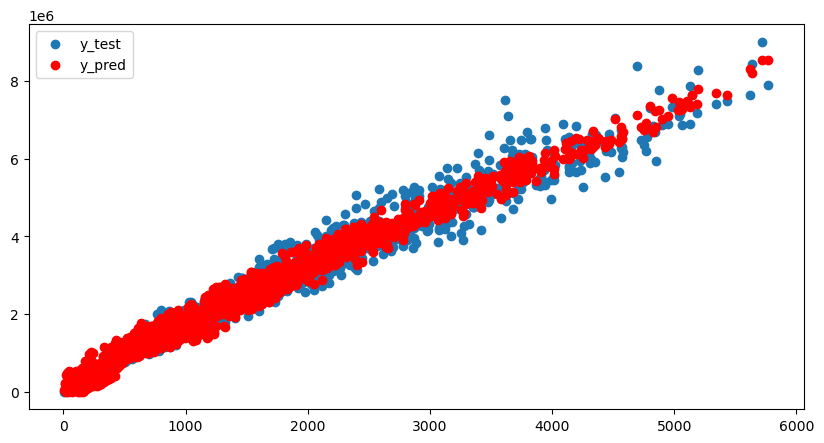

0.9817535213591023


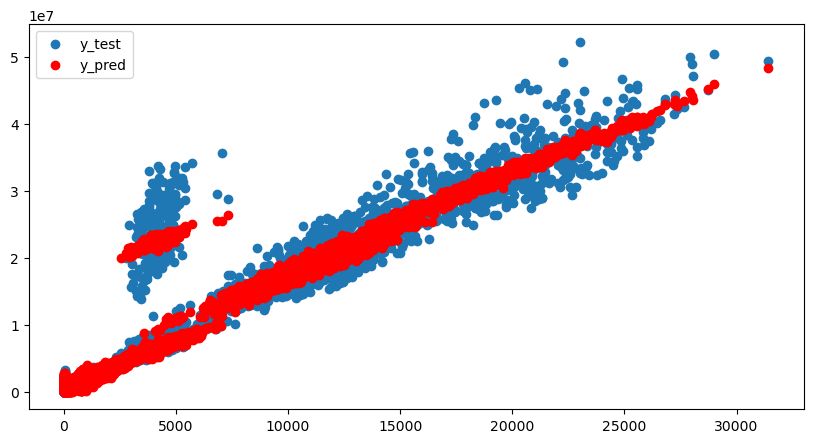

0.9655522940261914


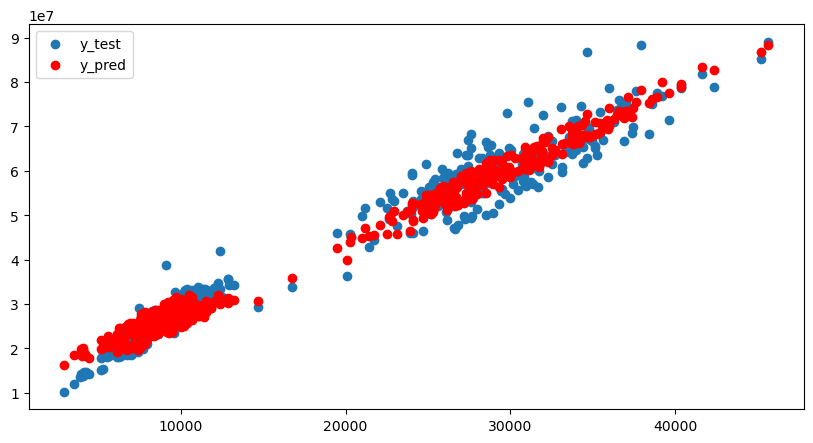

0.9726277351406493


In [40]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

for df in df_area:
    df_t=df.drop(['이상치여부','cityCode','citySidoName'],axis=1)
    df_t=df_t.astype({'disQuantityRate':'float','disCount':'int','disCountRate':'float','가계수입전망CSI':'int','소비지출전망CSI':'int'})
    
    df_test=pd.get_dummies(df_t)

    df_test['target']=df_test['disQuantity']
    df_test.drop('disQuantity',axis=1,inplace=True)
    
    x_data=df_test.drop(['target','disQuantityRate','disCountRate'],axis=1)
    y_data=df_test['target']

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15)
    #선형 회귀 모형
    lr=LinearRegression()
    lr.fit(x_train, y_train)

    #예측값 저장
    y_pred=lr.predict(x_test)

    y_pred=np.where(y_pred<0, y_pred*(-1), y_pred)

    #예측값과 실제값의 분포
    plt.figure(figsize=(10, 5)) #표 크기 지정
    plt.scatter(x_test['disCount'], y_test, label='y_test')  #파란점, 실제값
    plt.scatter(x_test['disCount'], y_pred, c='r', label='y_pred')  #빨간점, 예측값
    plt.legend(loc='best')  #범례(오른쪽 상단 박스)가 표시되는 위치 지정
    plt.show()
    
    
    R2 = r2_score(y_test, y_pred)
    print(R2)

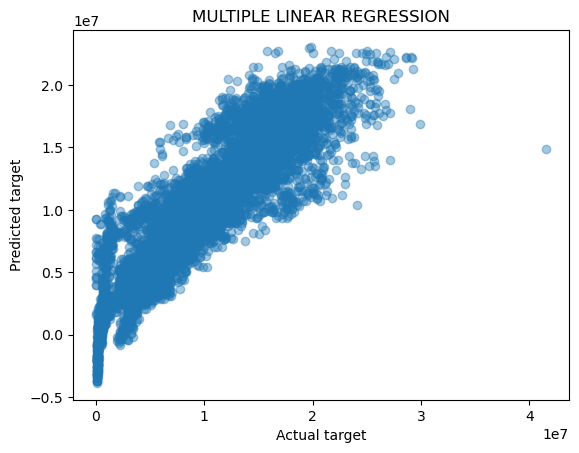

훈련 세트 점수 : 0.09
테스트 세트 점수 : 0.79
사용한 특성의 개수 :  34
0.7948628214761188


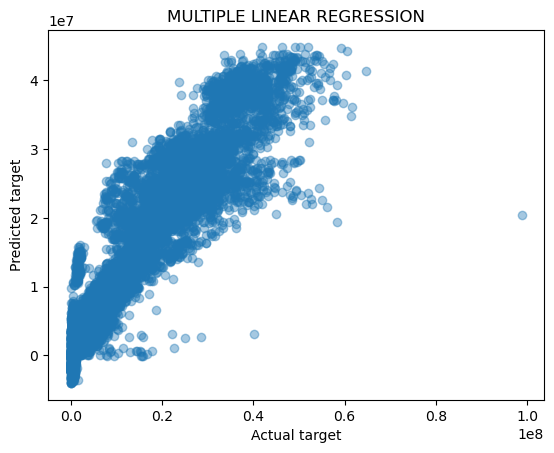

훈련 세트 점수 : 0.86
테스트 세트 점수 : 0.87
사용한 특성의 개수 :  52
0.8718327413384885


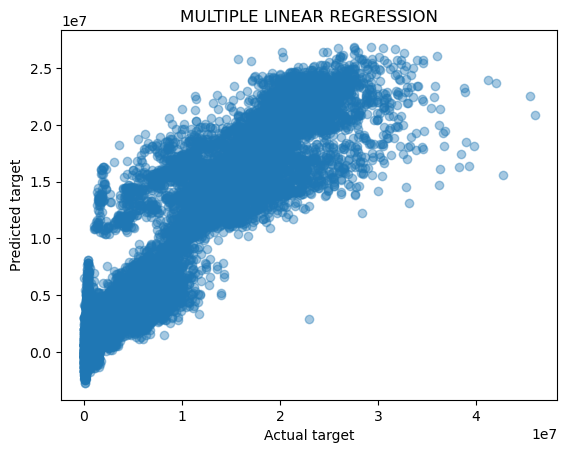

훈련 세트 점수 : 0.82
테스트 세트 점수 : 0.82
사용한 특성의 개수 :  42
0.8223487027117997


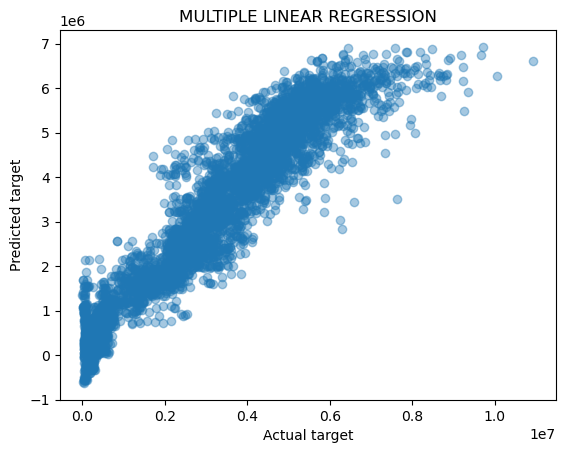

훈련 세트 점수 : 0.88
테스트 세트 점수 : 0.88
사용한 특성의 개수 :  28
0.8787093864948392


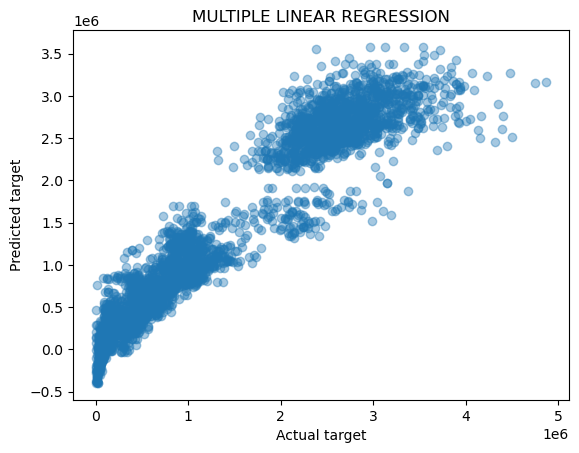

훈련 세트 점수 : 0.91
테스트 세트 점수 : 0.91
사용한 특성의 개수 :  25
0.9113475816977021


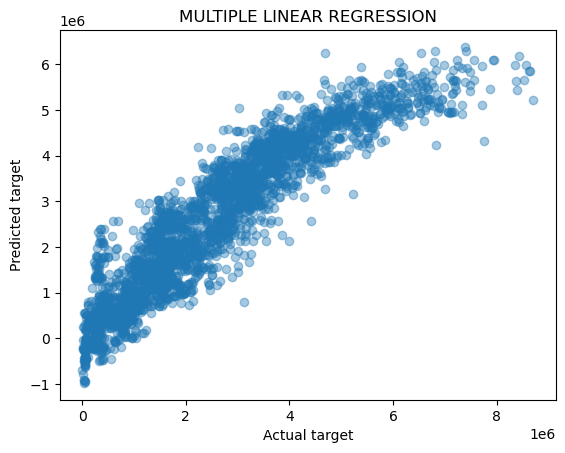

훈련 세트 점수 : 0.86
테스트 세트 점수 : 0.86
사용한 특성의 개수 :  24
0.8578462751582


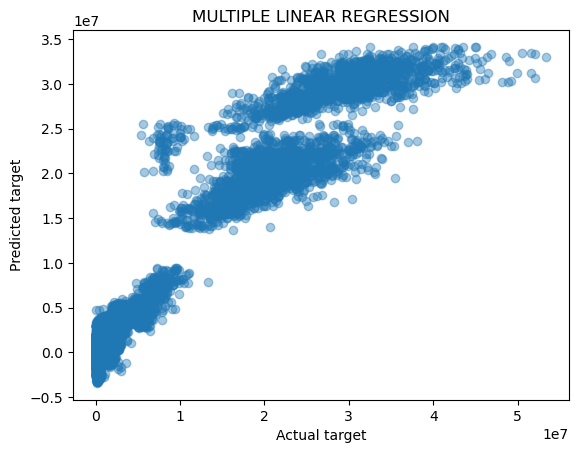

훈련 세트 점수 : 0.91
테스트 세트 점수 : 0.92
사용한 특성의 개수 :  37
0.9236327767531203


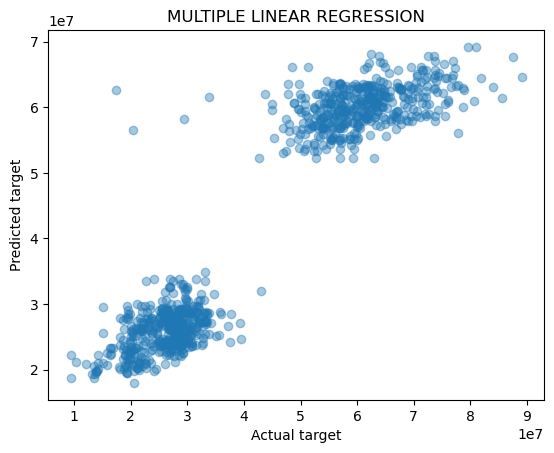

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.89
사용한 특성의 개수 :  17
0.8875968609170937


In [51]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

for df in df_area:
    df_t=df.drop(['disQuantityRate','disCount','disMonth','disDate','disCountRate','이상치여부','cityCode','citySidoName'],axis=1)
    df_t=df_t.astype({'가계수입전망CSI':'int','소비지출전망CSI':'int'})
    
    df_test=pd.get_dummies(df_t)

    df_test['target']=df_test['disQuantity']
    df_test.drop('disQuantity',axis=1,inplace=True)
    
    x_data=df_test.drop('target',axis=1)
    y_data=df_test['target']


    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

    mlr = LinearRegression()
    mlr.fit(x_train, y_train) 

    y_pred = mlr.predict(x_test)

    plt.scatter(y_test, y_pred, alpha=0.4)
    plt.xlabel("Actual target")
    plt.ylabel("Predicted target")
    plt.title("MULTIPLE LINEAR REGRESSION")
    plt.show()

    print('훈련 세트 점수 : {:.2f}'.format(mlr.score(x_train, y_train)))
    print('테스트 세트 점수 : {:.2f}'.format(mlr.score(x_test, y_test)))
    print('사용한 특성의 개수 : ', np.sum(mlr.coef_ != 0))
    
    R2 = r2_score(y_test, y_pred)
    print(R2)

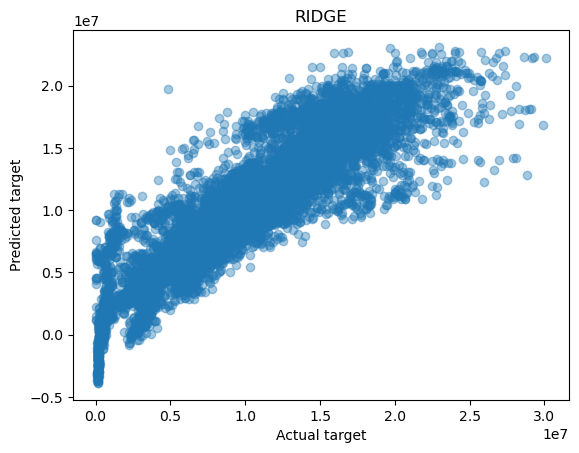

훈련 세트 점수 : 0.09
테스트 세트 점수 : 0.79
사용한 특성의 개수 :  34
0.7902206899316214


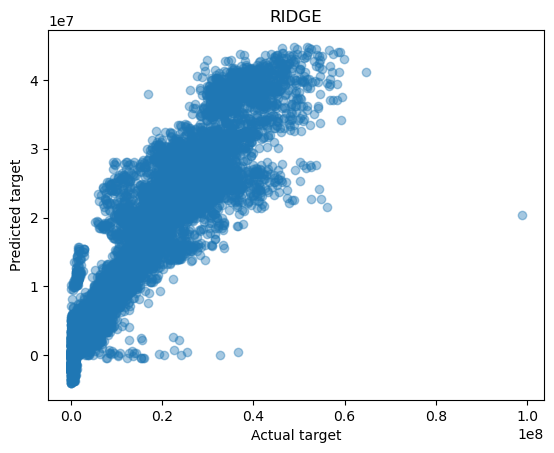

훈련 세트 점수 : 0.86
테스트 세트 점수 : 0.87
사용한 특성의 개수 :  52
0.8683187424202901


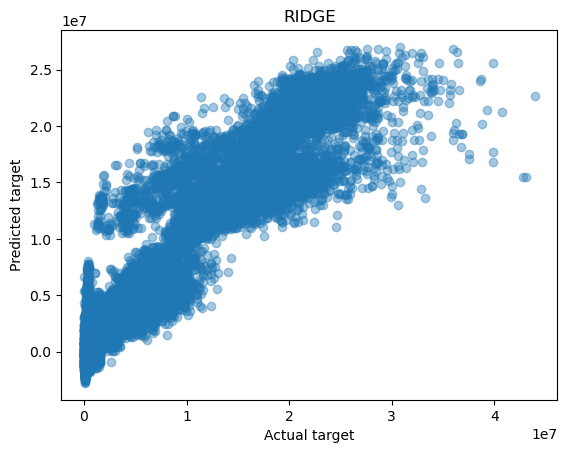

훈련 세트 점수 : 0.82
테스트 세트 점수 : 0.82
사용한 특성의 개수 :  42
0.8232099566775981


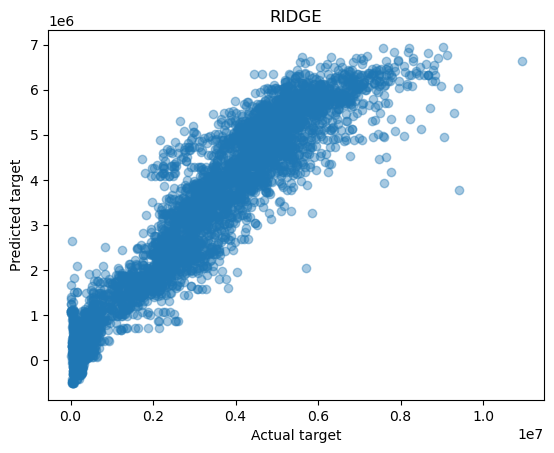

훈련 세트 점수 : 0.88
테스트 세트 점수 : 0.87
사용한 특성의 개수 :  28
0.8738144060865385


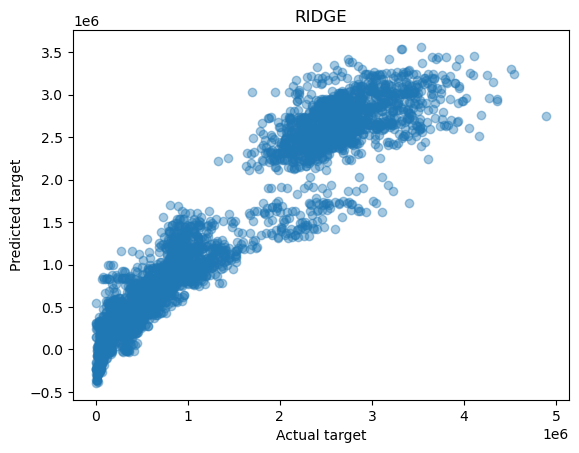

훈련 세트 점수 : 0.91
테스트 세트 점수 : 0.91
사용한 특성의 개수 :  25
0.9094503252195637


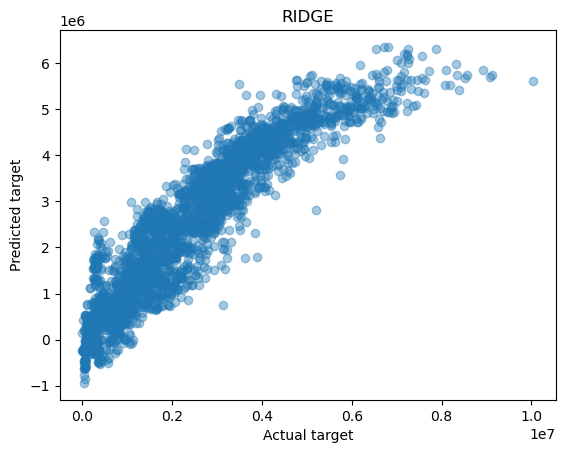

훈련 세트 점수 : 0.86
테스트 세트 점수 : 0.85
사용한 특성의 개수 :  24
0.8535801260314566


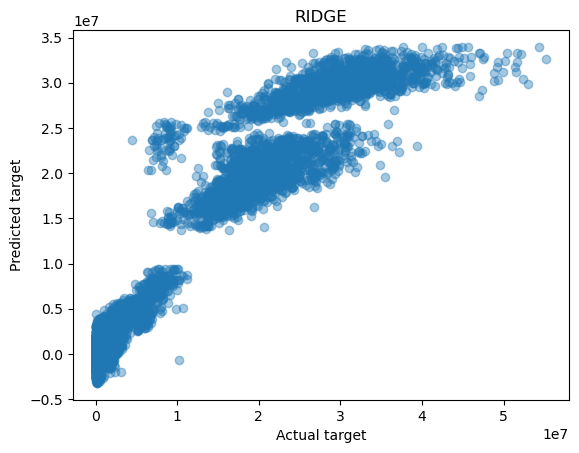

훈련 세트 점수 : 0.91
테스트 세트 점수 : 0.92
사용한 특성의 개수 :  37
0.9224670648857104


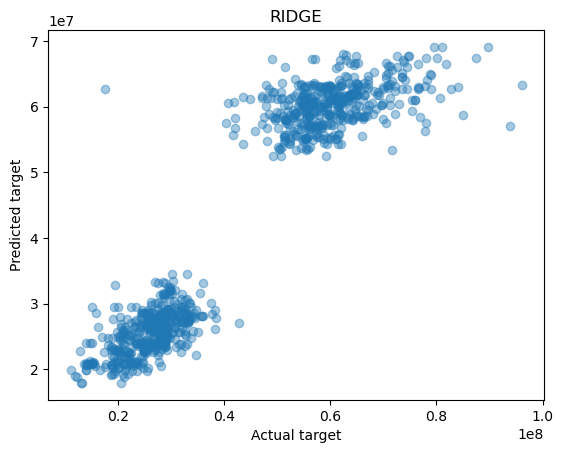

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.88
사용한 특성의 개수 :  17
0.8848210905598861


In [57]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

for df in df_area:
    df_t=df.drop(['disQuantityRate','disCount','disMonth','disDate','disCountRate','이상치여부','cityCode','citySidoName'],axis=1)
    df_t=df_t.astype({'가계수입전망CSI':'int','소비지출전망CSI':'int'})
    
    df_test=pd.get_dummies(df_t)

    df_test['target']=df_test['disQuantity']
    df_test.drop('disQuantity',axis=1,inplace=True)
    
    x_data=df_test.drop('target',axis=1)
    y_data=df_test['target']

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

    ridge=Ridge()
    ridge.fit(x_train, y_train) 

    y_pred = ridge.predict(x_test)

    plt.scatter(y_test, y_pred, alpha=0.4)
    plt.xlabel("Actual target")
    plt.ylabel("Predicted target")
    plt.title("RIDGE")
    plt.show()

    print('훈련 세트 점수 : {:.2f}'.format(ridge.score(x_train, y_train)))
    print('테스트 세트 점수 : {:.2f}'.format(ridge.score(x_test, y_test)))
    print('사용한 특성의 개수 : ', np.sum(ridge.coef_ != 0))
    
    R2 = r2_score(y_test, y_pred)
    print(R2)

In [56]:
df_seoul

disYear  disMonth disDate disDay cityCode citySidoName citySggName  \
0         2018         1      01      월      W01        서울특별시         종로구   
1         2018         1      02      화      W01        서울특별시         종로구   
2         2018         1      03      수      W01        서울특별시         종로구   
3         2018         1      04      목      W01        서울특별시         종로구   
4         2018         1      05      금      W01        서울특별시         종로구   
...        ...       ...     ...    ...      ...          ...         ...   
265235    2022        10      27      목      W0N        서울특별시         강남구   
265236    2022        10      28      금      W0N        서울특별시         강남구   
265237    2022        10      29      토      W0N        서울특별시         강남구   
265238    2022        10      30      일      W0N        서울특별시         강남구   
265239    2022        10      31      월      W0N        서울특별시         강남구   

        disQuantity disQuantityRate disCount disCountRate 가계수입전망CSI 소비지출전망CSI  \
0         2991900.0            3.93     1624         3.54       105       108   
1         2933150.0            3.85     1710         3.73       105       108   
2         2454150.0            3.22     1498         3.27       105       108   
3         2514150.0             3.3     1506         3.29       105       108   
4         2288100.0             3.0     1418          3.1       105       108   
...             ...             ...      ...          ...       ...       ...   
265235   17720450.0            3.09    14179         3.16        95       110   
265236   18075900.0            3.16    14548         3.24        95       110   
265237   17772400.0             3.1    13443         2.99        95       110   
265238   21908640.0            3.83    16019         3.57        95       110   
265239   20954640.0            3.66    15748         3.51        95       110   

        sin_Month  이상치여부  
0        0.500000  False  
1        0.500000  False  
2        0.500000  False  
3        0.500000  False  
4        0.500000  False  
...           ...    ...  
265235  -0.866025  False  
265236  -0.866025  False  
265237  -0.866025  False  
265238  -0.866025  False  
265239  -0.866025  False  

[32964 rows x 15 columns]

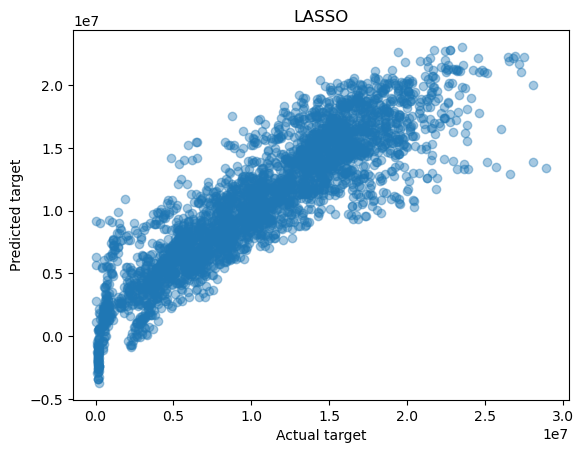

훈련 세트 점수 : 0.11
테스트 세트 점수 : 0.80
사용한 특성의 개수 :  34
0.8003820742575269


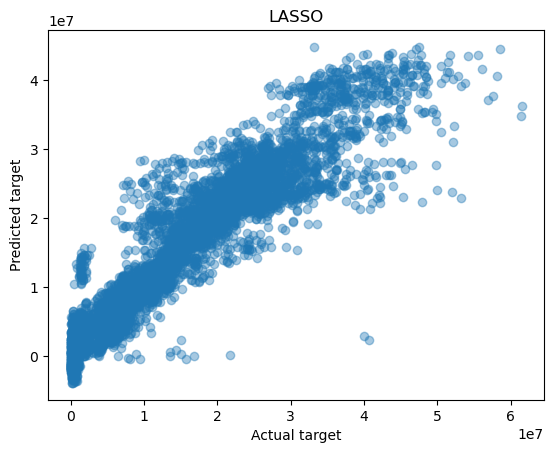

훈련 세트 점수 : 0.86
테스트 세트 점수 : 0.87
사용한 특성의 개수 :  52
0.8717648670035042


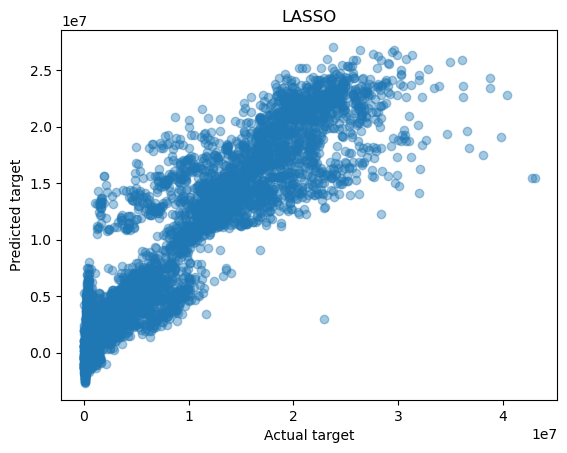

훈련 세트 점수 : 0.82
테스트 세트 점수 : 0.82
사용한 특성의 개수 :  42
0.8213890084727825


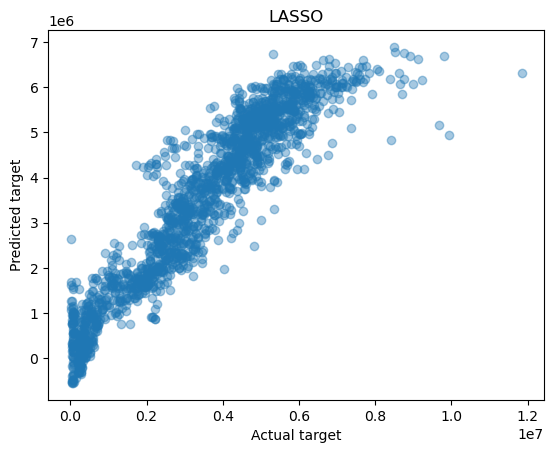

훈련 세트 점수 : 0.88
테스트 세트 점수 : 0.87
사용한 특성의 개수 :  28
0.8736587222002496


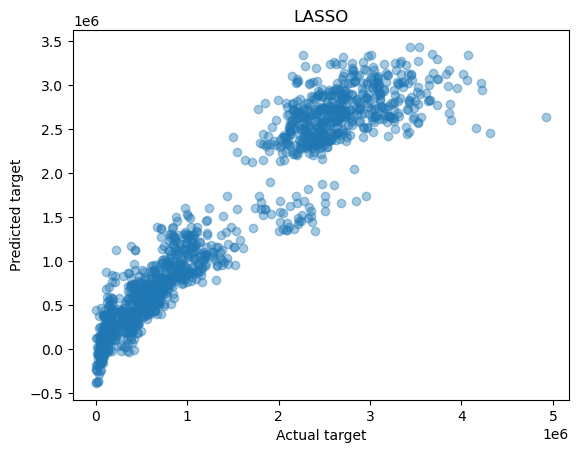

훈련 세트 점수 : 0.91
테스트 세트 점수 : 0.91
사용한 특성의 개수 :  25
0.9105091110113435


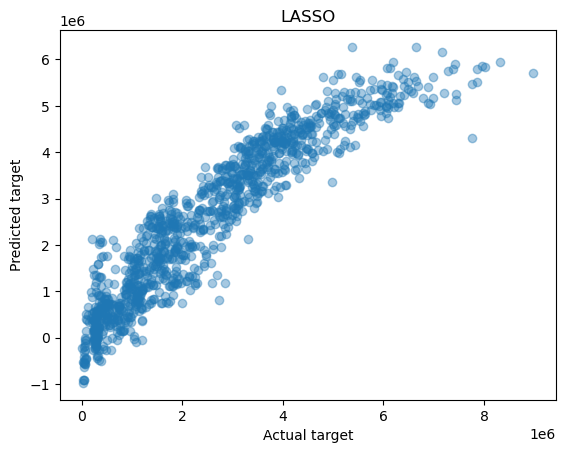

훈련 세트 점수 : 0.86
테스트 세트 점수 : 0.87
사용한 특성의 개수 :  24
0.8734104752598641


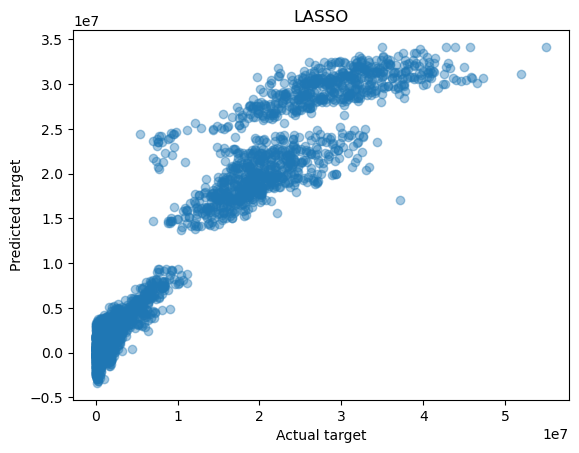

훈련 세트 점수 : 0.91
테스트 세트 점수 : 0.92
사용한 특성의 개수 :  37
0.923496801511371


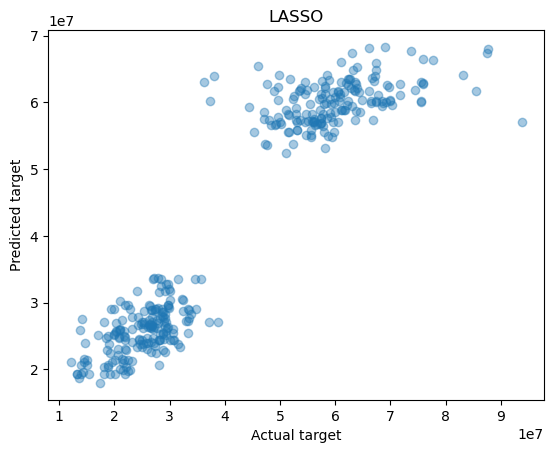

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.88
사용한 특성의 개수 :  17
0.880204678262012


In [65]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

for df in df_area:
    df_t=df.drop(['disQuantityRate','disCount','disMonth','disDate','disCountRate','이상치여부','cityCode','citySidoName'],axis=1)
    df_t=df_t.astype({'가계수입전망CSI':'int','소비지출전망CSI':'int'})
    
    df_test=pd.get_dummies(df_t)

    df_test['target']=df_test['disQuantity']
    df_test.drop('disQuantity',axis=1,inplace=True)
    
    x_data=df_test.drop('target',axis=1)
    y_data=df_test['target']


    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)

    lasso = Lasso()
    lasso.fit(x_train, y_train) 

    y_pred = lasso.predict(x_test)

    plt.scatter(y_test, y_pred, alpha=0.4)
    plt.xlabel("Actual target")
    plt.ylabel("Predicted target")
    plt.title("LASSO")
    plt.show()

    print('훈련 세트 점수 : {:.2f}'.format(lasso.score(x_train, y_train)))
    print('테스트 세트 점수 : {:.2f}'.format(lasso.score(x_test, y_test)))
    print('사용한 특성의 개수 : ', np.sum(lasso.coef_ != 0))
    
    R2 = r2_score(y_test, y_pred)
    print(R2)

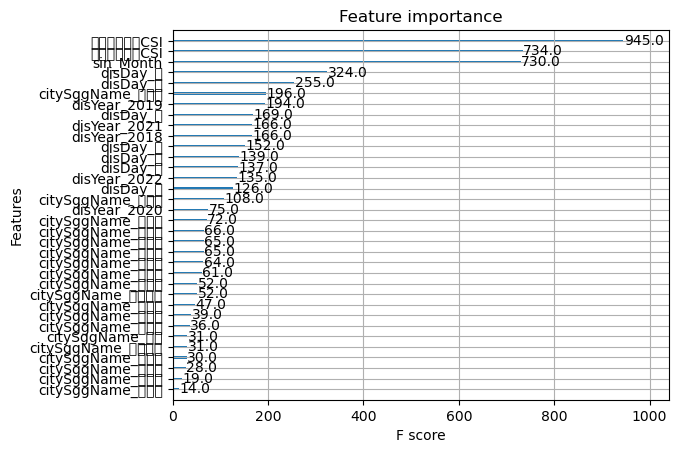

훈련 세트 점수 : 0.31
테스트 세트 점수 : 0.97
0.965444294191916


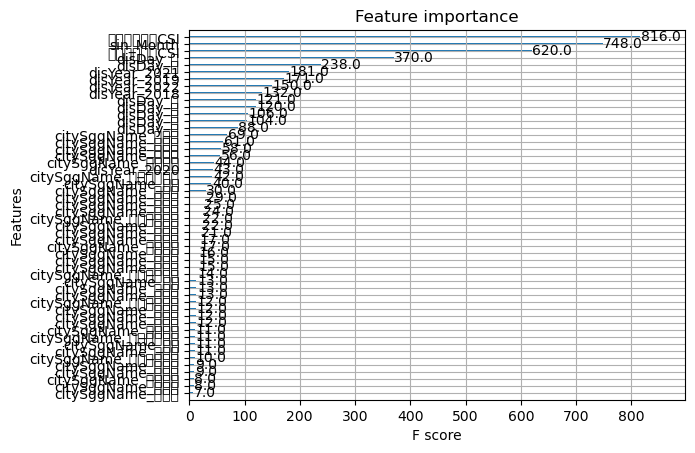

훈련 세트 점수 : 0.97
테스트 세트 점수 : 0.97
0.9731550173770586


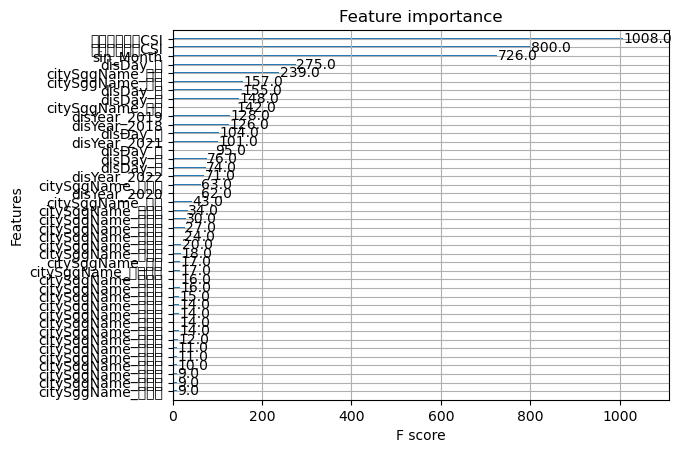

훈련 세트 점수 : 0.96
테스트 세트 점수 : 0.95
0.9475500370412571


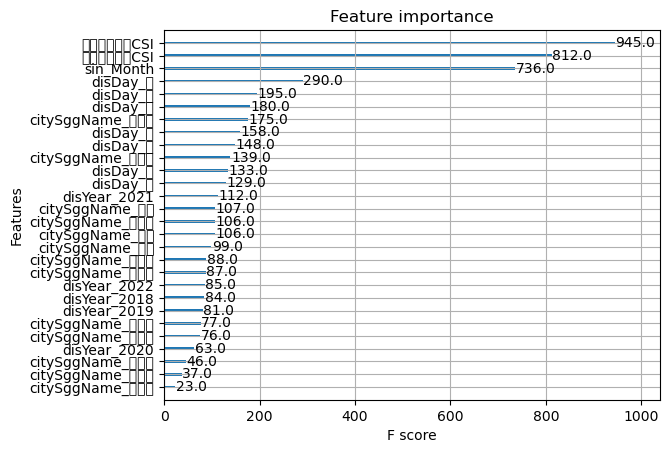

훈련 세트 점수 : 0.96
테스트 세트 점수 : 0.95
0.9498894650335299


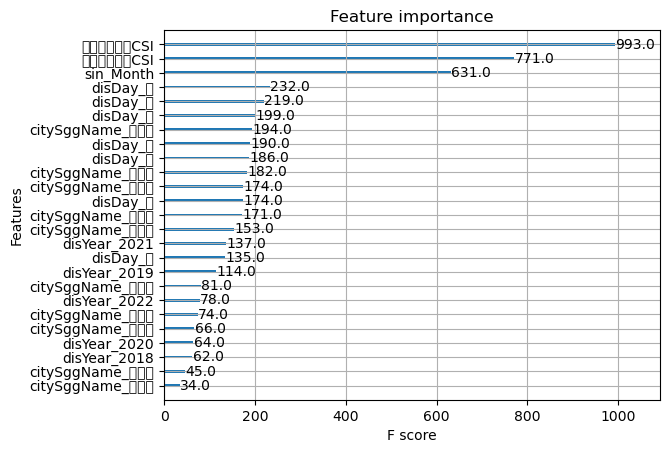

훈련 세트 점수 : 0.97
테스트 세트 점수 : 0.96
0.9611151017191597


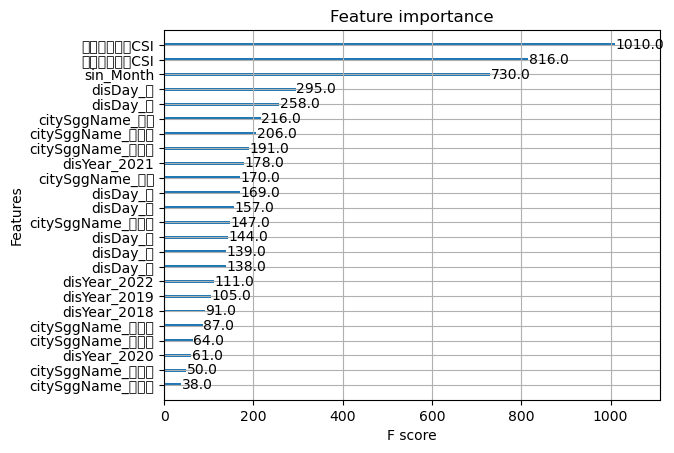

훈련 세트 점수 : 0.98
테스트 세트 점수 : 0.97
0.9684624861988088


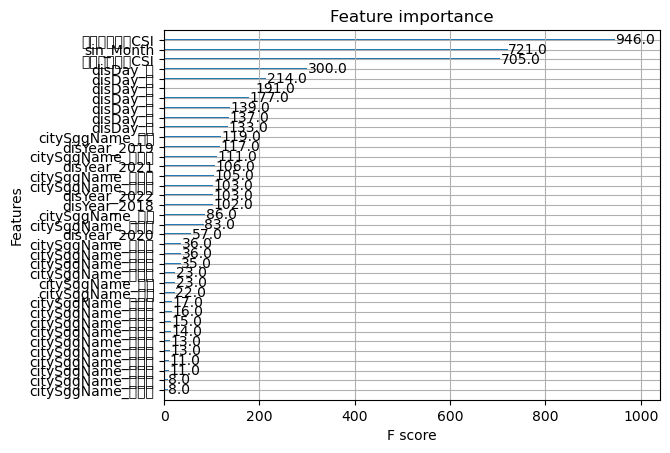

훈련 세트 점수 : 0.98
테스트 세트 점수 : 0.98
0.9756479338052831


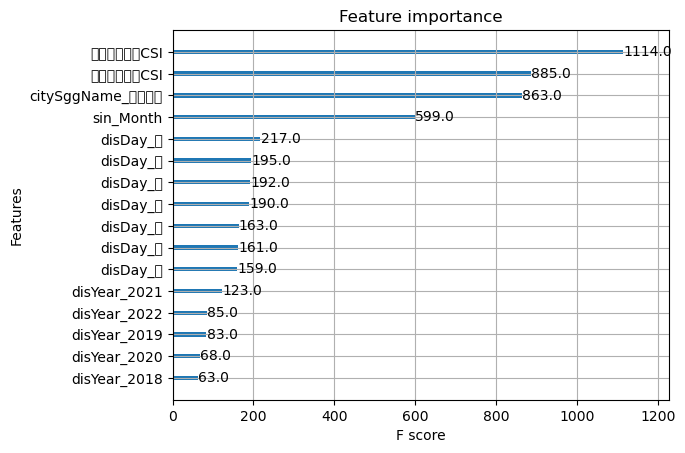

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.93
0.928000046744019


In [64]:
import xgboost
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

for df in df_area:
    df_t=df.drop(['disQuantityRate','disCount','disMonth','disDate','disCountRate','이상치여부','cityCode','citySidoName'],axis=1)
    df_t=df_t.astype({'가계수입전망CSI':'int','소비지출전망CSI':'int'})
    
    df_test=pd.get_dummies(df_t)

    df_test['target']=df_test['disQuantity']
    df_test.drop('disQuantity',axis=1,inplace=True)
    
    x_data=df_test.drop('target',axis=1)
    y_data=df_test['target']


    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)

    xgb_model = xgboost.XGBRegressor()
    xgb_model.fit(x_train,y_train)
    
    y_pred = xgb_model.predict(x_test)
    
    xgb.plot_importance(xgb_model)

    plt.show()
    
    print('훈련 세트 점수 : {:.2f}'.format(xgb_model.score(x_train, y_train)))
    print('테스트 세트 점수 : {:.2f}'.format(xgb_model.score(x_test, y_test)))
    
    R2 = r2_score(y_test, y_pred)
    print(R2)

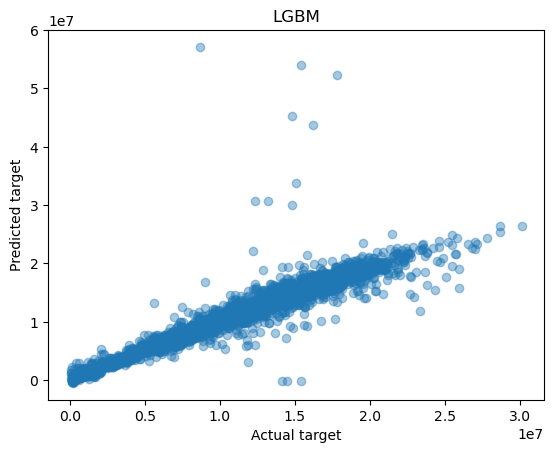

훈련 세트 점수 : 0.27
테스트 세트 점수 : 0.88
0.8751236730207543


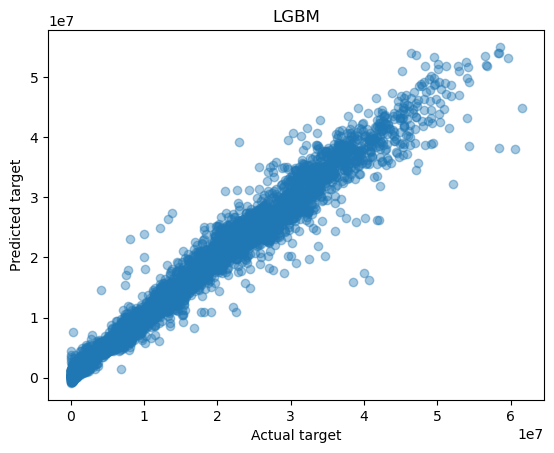

훈련 세트 점수 : 0.96
테스트 세트 점수 : 0.97
0.9702587730369996


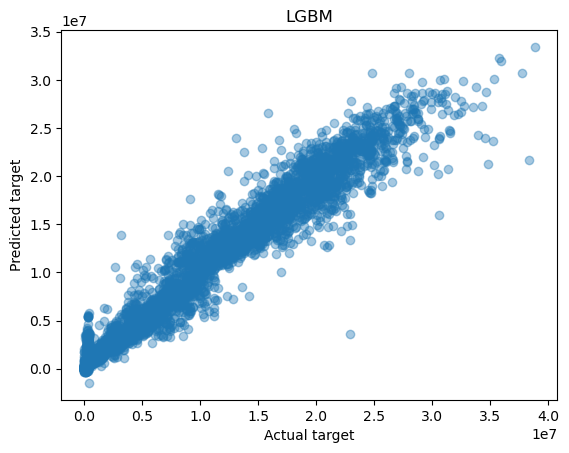

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.95
0.949926368986586


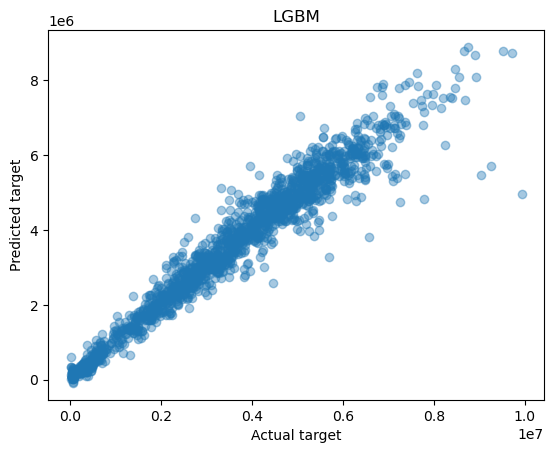

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.95
0.9493744106131713


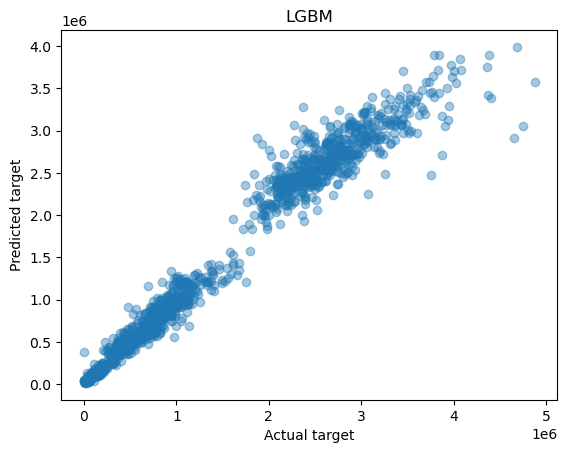

훈련 세트 점수 : 0.97
테스트 세트 점수 : 0.97
0.9668237911578035


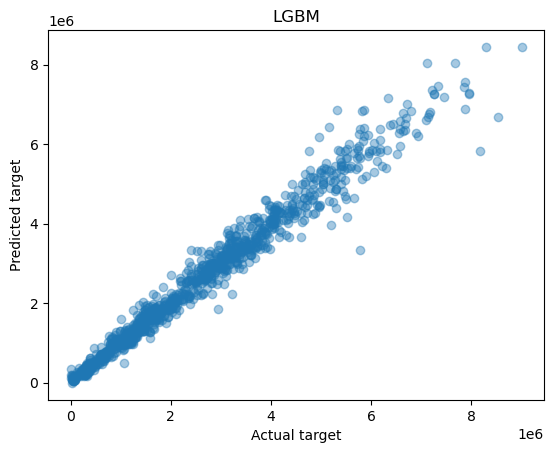

훈련 세트 점수 : 0.97
테스트 세트 점수 : 0.97
0.9746542399695352


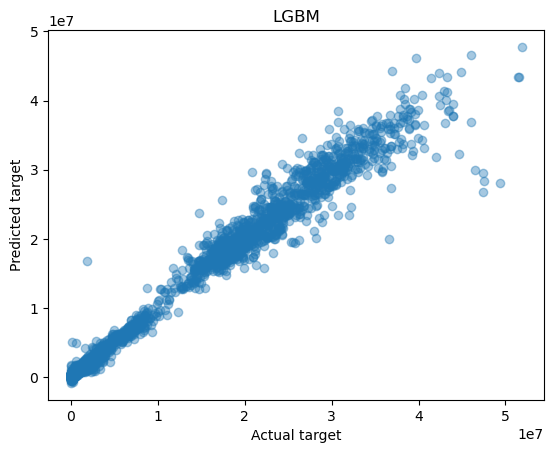

훈련 세트 점수 : 0.97
테스트 세트 점수 : 0.98
0.9791077932067268


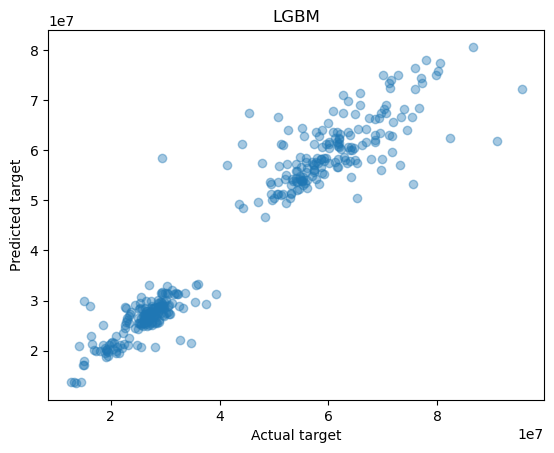

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.92
0.923818055000146


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor

for df in df_area:
    df_t=df.drop(['disQuantityRate','disCount','disMonth','disDate','disCountRate','이상치여부','cityCode','citySidoName'],axis=1)
    df_t=df_t.astype({'가계수입전망CSI':'int','소비지출전망CSI':'int'})
    
    df_test=pd.get_dummies(df_t)

    df_test['target']=df_test['disQuantity']
    df_test.drop('disQuantity',axis=1,inplace=True)
    
    x_data=df_test.drop('target',axis=1)
    y_data=df_test['target']


    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)

    lgbm=LGBMRegressor()
    lgbm.fit(x_train, y_train)
    
    y_pred = lgbm.predict(x_test)
    
    plt.scatter(y_test, y_pred, alpha=0.4)
    plt.xlabel("Actual target")
    plt.ylabel("Predicted target")
    plt.title("LGBM")
    plt.show()
    
    print('훈련 세트 점수 : {:.2f}'.format(lgbm.score(x_train, y_train)))
    print('테스트 세트 점수 : {:.2f}'.format(lgbm.score(x_test, y_test)))
    
    R2 = r2_score(y_test, y_pred)
    print(R2)

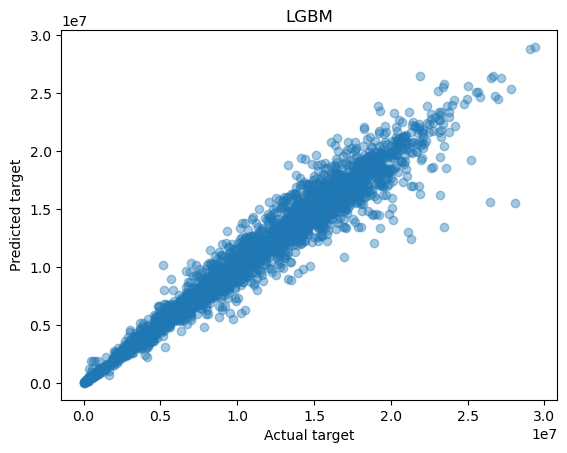

훈련 세트 점수 : 0.31
테스트 세트 점수 : 0.96
0.9580834170859883


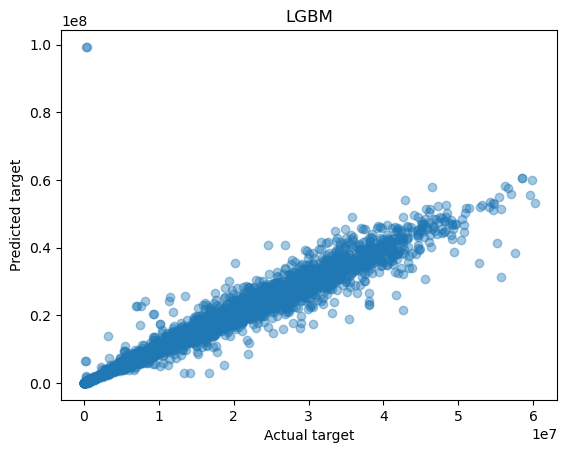

훈련 세트 점수 : 0.97
테스트 세트 점수 : 0.94
0.9439845169302177


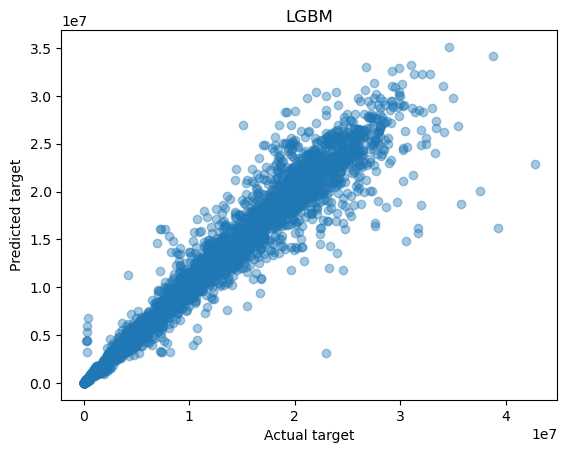

훈련 세트 점수 : 0.97
테스트 세트 점수 : 0.95
0.951726398146263


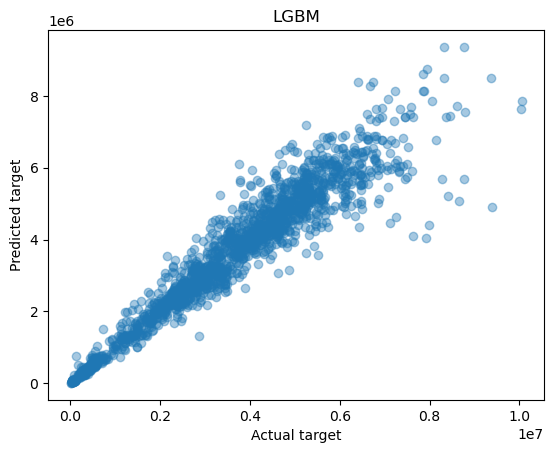

훈련 세트 점수 : 0.96
테스트 세트 점수 : 0.92
0.9227624753314495


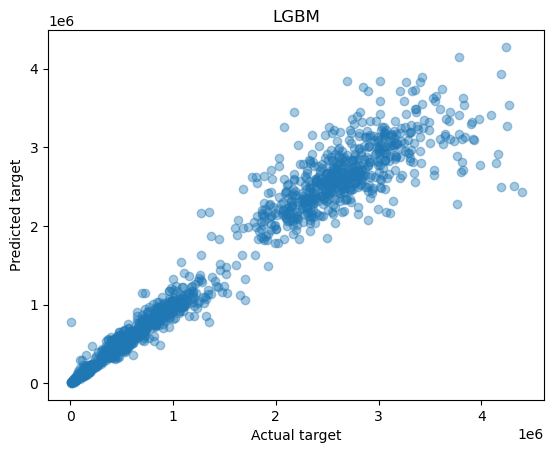

훈련 세트 점수 : 0.97
테스트 세트 점수 : 0.95
0.9470386609902416


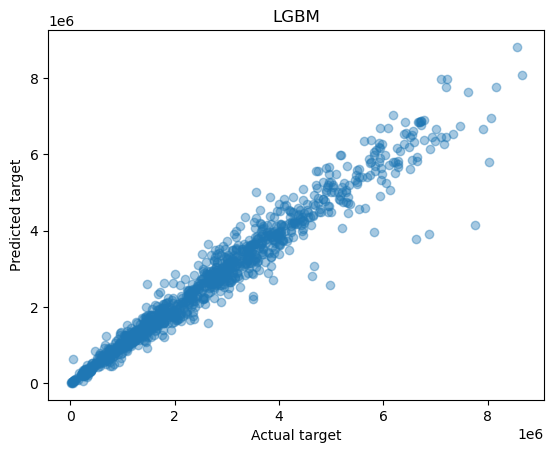

훈련 세트 점수 : 0.98
테스트 세트 점수 : 0.96
0.9575375462780005


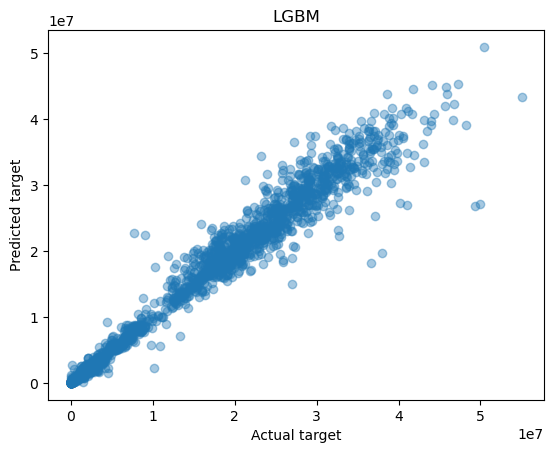

훈련 세트 점수 : 0.98
테스트 세트 점수 : 0.98
0.9761493937791819


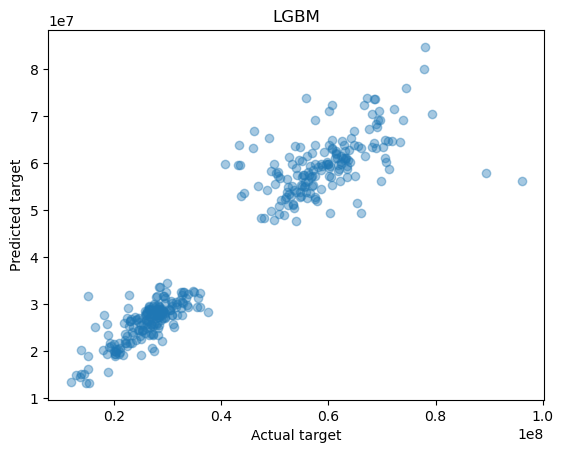

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.90
0.9032521135269967


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

for df in df_area:
    df_t=df.drop(['disQuantityRate','disCount','disMonth','disDate','disCountRate','이상치여부','cityCode','citySidoName'],axis=1)
    df_t=df_t.astype({'가계수입전망CSI':'int','소비지출전망CSI':'int'})
    
    df_test=pd.get_dummies(df_t)

    df_test['target']=df_test['disQuantity']
    df_test.drop('disQuantity',axis=1,inplace=True)
    
    x_data=df_test.drop('target',axis=1)
    y_data=df_test['target']


    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)

    dt=DecisionTreeRegressor()
    dt.fit(x_train, y_train)
    
    y_pred = dt.predict(x_test)
    
    plt.scatter(y_test, y_pred, alpha=0.4)
    plt.xlabel("Actual target")
    plt.ylabel("Predicted target")
    plt.title("LGBM")
    plt.show()
    
    print('훈련 세트 점수 : {:.2f}'.format(dt.score(x_train, y_train)))
    print('테스트 세트 점수 : {:.2f}'.format(dt.score(x_test, y_test)))
    
    R2 = r2_score(y_test, y_pred)
    print(R2)